In [ ]:
!pip install altair
!pip install simpy
!pip install pandas
!pip install matplotlib
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\glenn\AppData\Local\Temp\ipykernel_6060\2606405407.py:221: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


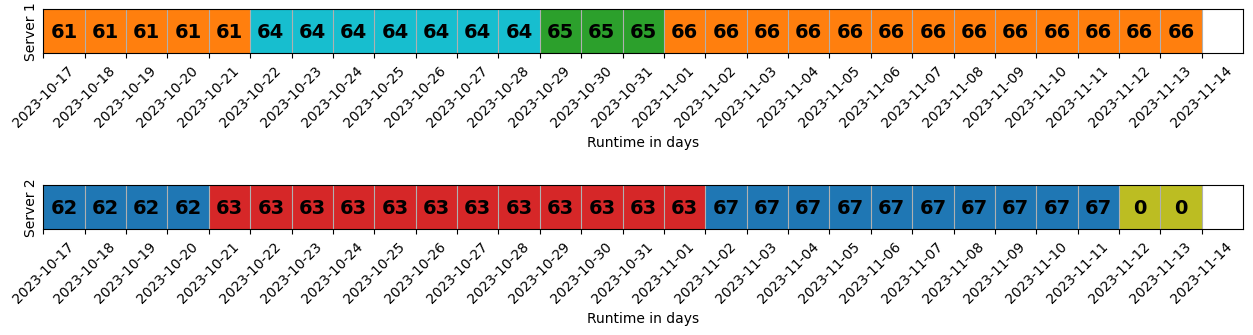

298
301
310
310
347
Utilization Rate of server 1:  0.9612903225806452
Utilization Rate of server 2:  0.9709677419354839
Average Turn Around Time:  22.28358208955224


In [ ]:
# @title 2 FIFO SIMULATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

job = {
    "job_num": list(range(1, 68)),
    "burst_time": [7, 13, 11, 4, 9, 8, 12, 7, 8, 8, 11, 7, 11, 7, 9,
                   13, 9, 8, 8, 8, 9, 8, 13, 9, 10, 9, 9, 8, 6, 11, 2, 7,
                   13, 8, 4, 8, 4, 9, 13, 7, 4, 10, 10, 13, 12, 11, 13, 9,
                   5, 11, 8, 8, 13, 8, 7, 5, 12, 9, 12, 9,
                   11, 9, 12, 7, 3, 13, 10],
    "arrival_time": [0, 4, 7, 12, 17, 20, 25, 30, 36, 40,
                     45, 51, 55, 61, 66, 72, 77, 79, 82, 84,
                     88, 94, 96, 100, 103, 105, 107, 112, 114, 117,
                     122, 124, 126, 129, 135, 140, 145, 148, 152, 157,
                     161, 167, 169, 174, 180, 184, 190, 196, 201, 207,
                     209, 214, 219, 221, 223, 228, 233, 238, 241, 245,
                     249, 255, 259, 261, 267, 270, 273],
    "waiting_time": [0] * 67,
    "turn_around_time": [0] * 67
}



arr_chart1 = [0]
arr_chart2 = [0]
sum_burst1 = []
sum_burst2 = []

# print(len(job['job_num']))
# print(len(job['burst_time']))
# print(len(job['arrival_time']))
# print(len(job['waiting_time']))
# print(len(job['turn_around_time']))

jobs = pd.DataFrame(job)
# print("Before simulation:\n" + jobs.to_string(index=False) + "\n")

def calcWaitTime(num, jobs):
    arr_burst = jobs["burst_time"].to_numpy(copy=True)
    current_time = 0
    shortest1 = -1
    shortest2 = -1
    completed = 0
    min1 = float('inf')
    min2 = float('inf')
    in_job1 = False
    in_job2 = False
    prev_job_num1 = 0
    prev_job_num2 = 0

    while (completed != num):
        for i in range(num):
            if (jobs.iloc[i]["arrival_time"] <= current_time
                    and arr_burst[i] > 0):

                if not in_job1 :
                    # print("i" + str(i))
                    if(i != shortest2):
                        shortest1 = i
                        min1 = arr_burst[i]
                        in_job1 = True

                    # if shortest1 == shortest2:
                    #     shortest1 = i+1
                    #     min1 = arr_burst[i+1]
                elif not in_job2:
                    if(i != shortest1):
                        shortest2 = i
                        min2 = arr_burst[i]
                        in_job2 = True


                    # if shortest1 == shortest2:
                    #     shortest2 = i
                    #     min2 = arr_burst[i+1]
        if not in_job1 and not in_job2:
            current_time += 1
            continue
        if min1 == float('inf'):
                        arr_chart1.append(0)
                        # print("true1")



        if min2 == float('inf'):
                        arr_chart2.append(0)
                        # print("true2")
        if in_job1:
            arr_chart1.append(jobs.iloc[shortest1]["job_num"])
            prev_job_num1 = jobs.iloc[shortest1]["job_num"]
            if arr_burst[shortest1] != 0:
                arr_burst[shortest1] -= 1
            sum_burst1.append(1)
            min1 = arr_burst[shortest1]
            if min1 == 0:
                min1 = float('inf')
                completed += 1
                in_job1 = False
                finish_time = current_time + 1
                jobs.at[shortest1, "waiting_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"] - jobs.iloc[shortest1]["burst_time"]
                if jobs.at[shortest1, "waiting_time"] < 0:
                    jobs.at[shortest1, "waiting_time"] = 0
                jobs.at[shortest1, "turn_around_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"]
                if jobs.at[shortest1, "turn_around_time"] < 0:
                    jobs.at[shortest1, "turn_around_time"] = 0

        if in_job2:
            arr_chart2.append(jobs.iloc[shortest2]["job_num"])
            prev_job_num2 = jobs.iloc[shortest2]["job_num"]
            if arr_burst[shortest2] != 0:
                arr_burst[shortest2] -= 1
            min2 = arr_burst[shortest2]
            sum_burst2.append(1)
            if min2 == 0:
                min2 = float('inf')
                completed += 1
                in_job2 = False
                finish_time = current_time + 1
                jobs.at[shortest2, "waiting_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"] - jobs.iloc[shortest2]["burst_time"]
                if jobs.at[shortest2, "waiting_time"] < 0:
                    jobs.at[shortest2, "waiting_time"] = 0
                jobs.at[shortest2, "turn_around_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"]
                if jobs.at[shortest2, "turn_around_time"] < 0:
                    jobs.at[shortest2, "turn_around_time"] = 0

        current_time += 1

calcWaitTime(67, jobs)
# print("After simulation:\n" + jobs.to_string(index=False) + "\n")

fig, (chart1, chart2) = plt.subplots(2, 1, figsize=(15, 2))

ylim_min = 0
ylim_max = 10
xlim_min = 282
xlim_max = 311

chart1.set_ylim(ylim_min, ylim_max)
chart2.set_ylim(ylim_min, ylim_max)
sum_burst = jobs["burst_time"].sum()
chart1.set_xlim(xlim_min, xlim_max)
chart2.set_xlim(xlim_min, xlim_max)

dates = pd.date_range(start="2023-01-08", end="2023-12-20", freq="D")
date_labels = [date.strftime('%Y-%m-%d') for date in dates]
# print(len(dates))

chart1.set_xticks(range(xlim_min, xlim_max))
chart1.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart2.set_xticks(range(xlim_min, xlim_max))
chart2.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart1.set_ylabel("Server 1")
chart2.set_ylabel("Server 2")
chart1.set_xlabel("Runtime in days")
chart2.set_xlabel("Runtime in days")
chart1.set_yticks([])
chart2.set_yticks([])
chart1.grid(True)
chart2.grid(True)

plt.subplots_adjust(hspace=3, top=1.2, bottom=0.1, left=0.1, right=0.9)

# print(arr_chart2)

j = xlim_min
for i in arr_chart1[xlim_min:xlim_max]:
    if i % 10 == 1 :
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))
    chart1.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

j = xlim_min
for i in arr_chart2[xlim_min:xlim_max]:
    if i % 10 == 1:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))

    chart2.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

plt.tight_layout()
plt.show()


util_rate1 = len(sum_burst1) / len(arr_chart1)
util_rate2 = len(sum_burst2) / len(arr_chart2)



print(len(sum_burst1))
print(len(sum_burst2))


print(len(arr_chart1))
print(len(arr_chart2))
print(len(dates))

print("Utilization Rate of server 1: ", util_rate1)
print("Utilization Rate of server 2: ", util_rate2)
print("Average Turn Around Time: ", jobs["turn_around_time"].mean())

**Carpenters' Jobs**

67


<ipython-input-1-733b1f6abc9f>:233: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


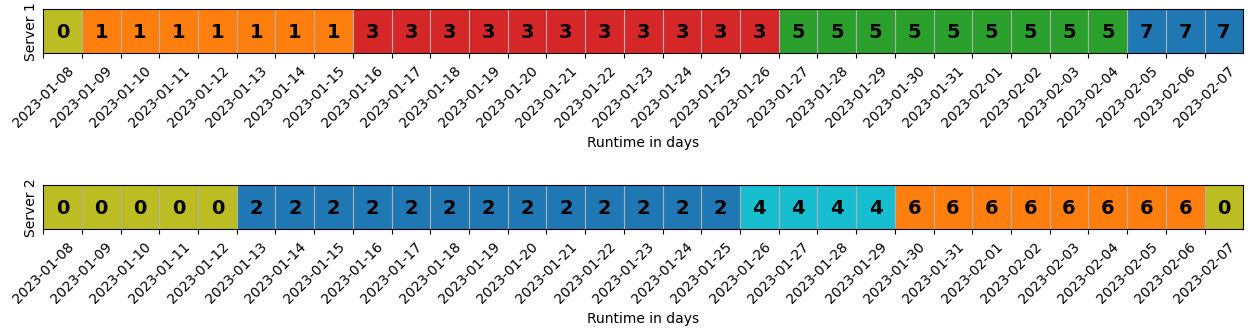

312
287
317
317
347
Utilization Rate of server 1:  0.9842271293375394
Utilization Rate of server 2:  0.9053627760252366
Average Turn Around Time:  22.865671641791046


In [1]:
# @title 2 FIFO SIMULATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

job = {
     "names" : [
    'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul',
    'Zaldo', 'Paul', 'Zaldo', 'Zaldo', 'Paul',
    'Zaldo', 'Paul', 'Paul', 'Zaldo', 'Paul', 'Zaldo',
    'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo',
    'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Zaldo',
    'Paul', 'Zaldo', 'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo',
    'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo',
    'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul',
    'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul', 'Zaldo', 'Paul',
    'Zaldo', 'Paul', 'Paul', 'Zaldo'],
    "job_num": list(range(1, 68)),
    "burst_time": [7, 13, 11, 4, 9, 8, 12, 7, 8, 8, 11, 7, 11, 7, 9,
                   13, 9, 8, 8, 8, 9, 8, 13, 9, 10, 9, 9, 8, 6, 11, 2, 7,
                   13, 8, 4, 8, 4, 9, 13, 7, 4, 10, 10, 13, 12, 11, 13, 9,
                   5, 11, 8, 8, 13, 8, 7, 5, 12, 9, 12, 9,
                   11, 9, 12, 7, 3, 13, 10],
    "arrival_time": [0, 4, 7, 12, 17, 20, 25, 30, 36, 40,
                     45, 51, 55, 61, 66, 72, 77, 79, 82, 84,
                     88, 94, 96, 100, 103, 105, 107, 112, 114, 117,
                     122, 124, 126, 129, 135, 140, 145, 148, 152, 157,
                     161, 167, 169, 174, 180, 184, 190, 196, 201, 207,
                     209, 214, 219, 221, 223, 228, 233, 238, 241, 245,
                     249, 255, 259, 261, 267, 270, 273],
    "waiting_time": [0] * 67,
    "turn_around_time": [0] * 67
}



arr_chart1 = [0]
arr_chart2 = [0]
sum_burst1 = []
sum_burst2 = []
print(len(job['names']))
# print(len(job['job_num']))
# print(len(job['burst_time']))
# print(len(job['arrival_time']))
# print(len(job['waiting_time']))
# print(len(job['turn_around_time']))

jobs = pd.DataFrame(job)
# print("Before simulation:\n" + jobs.to_string(index=False) + "\n")

def calcWaitTime(num, jobs):
    arr_burst = jobs["burst_time"].to_numpy(copy=True)
    current_time = 0
    shortest1 = -1
    shortest2 = -1
    completed = 0
    min1 = float('inf')
    min2 = float('inf')
    in_job1 = False
    in_job2 = False
    prev_job_num1 = 0
    prev_job_num2 = 0

    while (completed != num):
        for i in range(num):
            if (jobs.iloc[i]["arrival_time"] <= current_time
                    and arr_burst[i] > 0):

                if not in_job1 and jobs.loc[i, "names"] != "Zaldo":
                    # print("i" + str(i))
                    if(i != shortest2):
                        shortest1 = i
                        min1 = arr_burst[i]
                        in_job1 = True

                    # if shortest1 == shortest2:
                    #     shortest1 = i+1
                    #     min1 = arr_burst[i+1]
                elif not in_job2 and jobs.loc[i, "names"] != "Paul":
                    if(i != shortest1):
                        shortest2 = i
                        min2 = arr_burst[i]
                        in_job2 = True


                    # if shortest1 == shortest2:
                    #     shortest2 = i
                    #     min2 = arr_burst[i+1]
        if not in_job1 and not in_job2:
            current_time += 1
            continue
        if min1 == float('inf'):
                        arr_chart1.append(0)
                        # print("true1")



        if min2 == float('inf'):
                        arr_chart2.append(0)
                        # print("true2")
        if in_job1:
            arr_chart1.append(jobs.iloc[shortest1]["job_num"])
            prev_job_num1 = jobs.iloc[shortest1]["job_num"]
            if arr_burst[shortest1] != 0:
                arr_burst[shortest1] -= 1
            sum_burst1.append(1)
            min1 = arr_burst[shortest1]
            if min1 == 0:
                min1 = float('inf')
                completed += 1
                in_job1 = False
                finish_time = current_time + 1
                jobs.at[shortest1, "waiting_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"] - jobs.iloc[shortest1]["burst_time"]
                if jobs.at[shortest1, "waiting_time"] < 0:
                    jobs.at[shortest1, "waiting_time"] = 0
                jobs.at[shortest1, "turn_around_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"]
                if jobs.at[shortest1, "turn_around_time"] < 0:
                    jobs.at[shortest1, "turn_around_time"] = 0

        if in_job2:
            arr_chart2.append(jobs.iloc[shortest2]["job_num"])
            prev_job_num2 = jobs.iloc[shortest2]["job_num"]
            if arr_burst[shortest2] != 0:
                arr_burst[shortest2] -= 1
            min2 = arr_burst[shortest2]
            sum_burst2.append(1)
            if min2 == 0:
                min2 = float('inf')
                completed += 1
                in_job2 = False
                finish_time = current_time + 1
                jobs.at[shortest2, "waiting_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"] - jobs.iloc[shortest2]["burst_time"]
                if jobs.at[shortest2, "waiting_time"] < 0:
                    jobs.at[shortest2, "waiting_time"] = 0
                jobs.at[shortest2, "turn_around_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"]
                if jobs.at[shortest2, "turn_around_time"] < 0:
                    jobs.at[shortest2, "turn_around_time"] = 0

        current_time += 1

calcWaitTime(67, jobs)
# print("After simulation:\n" + jobs.to_string(index=False) + "\n")

fig, (chart1, chart2) = plt.subplots(2, 1, figsize=(15, 2))

ylim_min = 0
ylim_max = 10
xlim_min = 0
xlim_max = 31

chart1.set_ylim(ylim_min, ylim_max)
chart2.set_ylim(ylim_min, ylim_max)
sum_burst = jobs["burst_time"].sum()
chart1.set_xlim(xlim_min, xlim_max)
chart2.set_xlim(xlim_min, xlim_max)

dates = pd.date_range(start="2023-01-08", end="2023-12-20", freq="D")
date_labels = [date.strftime('%Y-%m-%d') for date in dates]
# print(len(dates))

chart1.set_xticks(range(xlim_min, xlim_max))
chart1.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart2.set_xticks(range(xlim_min, xlim_max))
chart2.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart1.set_ylabel("Server 1")
chart2.set_ylabel("Server 2")
chart1.set_xlabel("Runtime in days")
chart2.set_xlabel("Runtime in days")
chart1.set_yticks([])
chart2.set_yticks([])
chart1.grid(True)
chart2.grid(True)

plt.subplots_adjust(hspace=3, top=1.2, bottom=0.1, left=0.1, right=0.9)

# print(arr_chart2)

j = xlim_min
for i in arr_chart1[xlim_min:xlim_max]:
    if i % 10 == 1 :
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))
    chart1.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

j = xlim_min
for i in arr_chart2[xlim_min:xlim_max]:
    if i % 10 == 1:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))

    chart2.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

plt.tight_layout()
plt.show()


util_rate1 = len(sum_burst1) / len(arr_chart1)
util_rate2 = len(sum_burst2) / len(arr_chart2)



print(len(sum_burst1))
print(len(sum_burst2))


print(len(arr_chart1))
print(len(arr_chart2))
print(len(dates))

print("Utilization Rate of server 1: ", util_rate1)
print("Utilization Rate of server 2: ", util_rate2)
print("Average Turn Around Time: ", jobs["turn_around_time"].mean())

**Painters' Jobs**

67


<ipython-input-2-4f8194731df4>:233: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


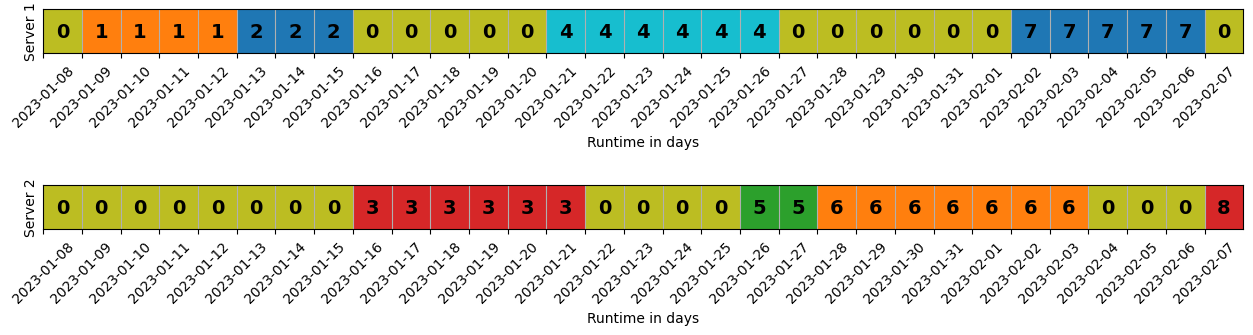

148
145
243
243
347
Utilization Rate of server 1:  0.6090534979423868
Utilization Rate of server 2:  0.5967078189300411
Average Turn Around Time:  4.850746268656716


In [2]:
# @title 2 FIFO SIMULATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

job = {
     "names" : [
    "Milgar", "Milgar", "Erwin", "Milgar", "Erwin", "Erwin", "Milgar", "Erwin",
    "Erwin", "Milgar", "Milgar", "Milgar", "Milgar", "Erwin", "Erwin", "Milgar",
    "Erwin", "Milgar", "Erwin", "Milgar", "Milgar", "Erwin", "Milgar", "Erwin",
    "Milgar", "Milgar", "Milgar", "Erwin", "Erwin", "Erwin", "Milgar", "Milgar",
    "Erwin", "Erwin", "Milgar", "Erwin", "Milgar", "Erwin", "Milgar", "Erwin",
    "Milgar", "Erwin", "Erwin", "Erwin", "Milgar", "Milgar", "Milgar", "Erwin",
    "Milgar", "Milgar", "Erwin", "Milgar", "Milgar", "Erwin", "Erwin", "Erwin",
    "Erwin", "Milgar", "Milgar", "Erwin", "Erwin", "Milgar", "Erwin", "Milgar",
    "Erwin", "Milgar", "Erwin"
],
    "job_num": list(range(1, 68)),
    "burst_time": [
    4, 3, 6, 6, 2, 7, 5, 7, 7, 5, 2, 3, 3, 2, 5, 6, 6, 6, 2, 4, 7, 5, 5, 3, 5,
    4, 3, 7, 3, 4, 2, 7, 2, 5, 5, 6, 4, 2, 6, 4, 5, 2, 2, 5, 2, 3, 6, 7, 5, 2,
    5, 2, 5, 4, 6, 5, 4, 5, 7, 4, 5, 2, 3, 3, 2, 6, 6
],
    "arrival_time": [0, 4, 7, 12, 17, 20, 25, 30, 36, 40,
                     45, 51, 55, 61, 66, 72, 77, 79, 82, 84,
                     88, 94, 96, 100, 103, 105, 107, 112, 114, 117,
                     122, 124, 126, 129, 135, 140, 145, 148, 152, 157,
                     161, 167, 169, 174, 180, 184, 190, 196, 201, 207,
                     209, 214, 219, 221, 223, 228, 233, 238, 241, 245,
                     249, 255, 259, 261, 267, 270, 273],
    "waiting_time": [0] * 67,
    "turn_around_time": [0] * 67
}



arr_chart1 = [0]
arr_chart2 = [0]
sum_burst1 = []
sum_burst2 = []
print(len(job['names']))
# print(len(job['job_num']))
# print(len(job['burst_time']))
# print(len(job['arrival_time']))
# print(len(job['waiting_time']))
# print(len(job['turn_around_time']))

jobs = pd.DataFrame(job)
# print("Before simulation:\n" + jobs.to_string(index=False) + "\n")

def calcWaitTime(num, jobs):
    arr_burst = jobs["burst_time"].to_numpy(copy=True)
    current_time = 0
    shortest1 = -1
    shortest2 = -1
    completed = 0
    min1 = float('inf')
    min2 = float('inf')
    in_job1 = False
    in_job2 = False
    prev_job_num1 = 0
    prev_job_num2 = 0

    while (completed != num):
        for i in range(num):
            if (jobs.iloc[i]["arrival_time"] <= current_time
                    and arr_burst[i] > 0):

                if not in_job1 and jobs.loc[i, "names"] != "Erwin":
                    # print("i" + str(i))
                    if(i != shortest2):
                        shortest1 = i
                        min1 = arr_burst[i]
                        in_job1 = True

                    # if shortest1 == shortest2:
                    #     shortest1 = i+1
                    #     min1 = arr_burst[i+1]
                elif not in_job2 and jobs.loc[i, "names"] != "Milgar":
                    if(i != shortest1):
                        shortest2 = i
                        min2 = arr_burst[i]
                        in_job2 = True


                    # if shortest1 == shortest2:
                    #     shortest2 = i
                    #     min2 = arr_burst[i+1]
        if not in_job1 and not in_job2:
            current_time += 1
            continue
        if min1 == float('inf'):
                        arr_chart1.append(0)
                        # print("true1")



        if min2 == float('inf'):
                        arr_chart2.append(0)
                        # print("true2")
        if in_job1:
            arr_chart1.append(jobs.iloc[shortest1]["job_num"])
            prev_job_num1 = jobs.iloc[shortest1]["job_num"]
            if arr_burst[shortest1] != 0:
                arr_burst[shortest1] -= 1
            sum_burst1.append(1)
            min1 = arr_burst[shortest1]
            if min1 == 0:
                min1 = float('inf')
                completed += 1
                in_job1 = False
                finish_time = current_time + 1
                jobs.at[shortest1, "waiting_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"] - jobs.iloc[shortest1]["burst_time"]
                if jobs.at[shortest1, "waiting_time"] < 0:
                    jobs.at[shortest1, "waiting_time"] = 0
                jobs.at[shortest1, "turn_around_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"]
                if jobs.at[shortest1, "turn_around_time"] < 0:
                    jobs.at[shortest1, "turn_around_time"] = 0

        if in_job2:
            arr_chart2.append(jobs.iloc[shortest2]["job_num"])
            prev_job_num2 = jobs.iloc[shortest2]["job_num"]
            if arr_burst[shortest2] != 0:
                arr_burst[shortest2] -= 1
            min2 = arr_burst[shortest2]
            sum_burst2.append(1)
            if min2 == 0:
                min2 = float('inf')
                completed += 1
                in_job2 = False
                finish_time = current_time + 1
                jobs.at[shortest2, "waiting_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"] - jobs.iloc[shortest2]["burst_time"]
                if jobs.at[shortest2, "waiting_time"] < 0:
                    jobs.at[shortest2, "waiting_time"] = 0
                jobs.at[shortest2, "turn_around_time"] = finish_time - jobs.iloc[shortest2]["arrival_time"]
                if jobs.at[shortest2, "turn_around_time"] < 0:
                    jobs.at[shortest2, "turn_around_time"] = 0

        current_time += 1

calcWaitTime(67, jobs)
# print("After simulation:\n" + jobs.to_string(index=False) + "\n")

fig, (chart1, chart2) = plt.subplots(2, 1, figsize=(15, 2))

ylim_min = 0
ylim_max = 10
xlim_min = 0
xlim_max = 31

chart1.set_ylim(ylim_min, ylim_max)
chart2.set_ylim(ylim_min, ylim_max)
sum_burst = jobs["burst_time"].sum()
chart1.set_xlim(xlim_min, xlim_max)
chart2.set_xlim(xlim_min, xlim_max)

dates = pd.date_range(start="2023-01-08", end="2023-12-20", freq="D")
date_labels = [date.strftime('%Y-%m-%d') for date in dates]
# print(len(dates))

chart1.set_xticks(range(xlim_min, xlim_max))
chart1.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart2.set_xticks(range(xlim_min, xlim_max))
chart2.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart1.set_ylabel("Server 1")
chart2.set_ylabel("Server 2")
chart1.set_xlabel("Runtime in days")
chart2.set_xlabel("Runtime in days")
chart1.set_yticks([])
chart2.set_yticks([])
chart1.grid(True)
chart2.grid(True)

plt.subplots_adjust(hspace=3, top=1.2, bottom=0.1, left=0.1, right=0.9)

# print(arr_chart2)

j = xlim_min
for i in arr_chart1[xlim_min:xlim_max]:
    if i % 10 == 1 :
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))
    chart1.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

j = xlim_min
for i in arr_chart2[xlim_min:xlim_max]:
    if i % 10 == 1:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart2.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))

    chart2.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

plt.tight_layout()
plt.show()


util_rate1 = len(sum_burst1) / len(arr_chart1)
util_rate2 = len(sum_burst2) / len(arr_chart2)



print(len(sum_burst1))
print(len(sum_burst2))


print(len(arr_chart1))
print(len(arr_chart2))
print(len(dates))

print("Utilization Rate of server 1: ", util_rate1)
print("Utilization Rate of server 2: ", util_rate2)
print("Average Turn Around Time: ", jobs["turn_around_time"].mean())

**Upholsters' Jobs**

67


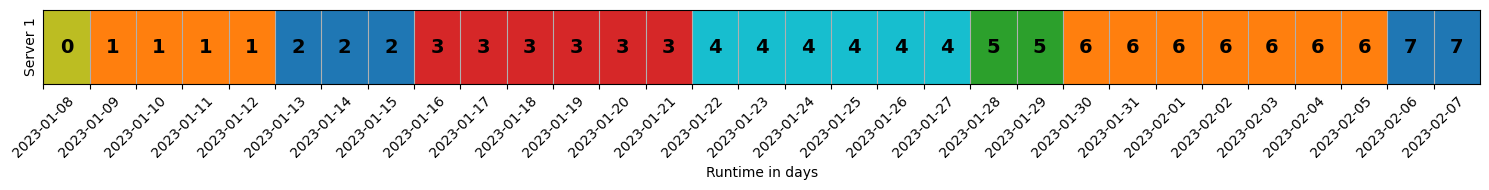

293
294
347
Utilization Rate of server 1:  0.9965986394557823
Average Turn Around Time:  18.104477611940297


In [7]:
# @title 2 FIFO SIMULATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

job = {
     "names" : [
    "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy",
    "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy",
    "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy",
    "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy",
    "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy",
    "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy",
    "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy", "Randy",
    "Randy", "Randy", "Randy", "Randy"
],
    "job_num": list(range(1, 68)),
    "burst_time": [
    4, 3, 6, 6, 2, 7, 5, 7, 7, 5, 2, 3, 3, 2, 5, 6, 6, 6, 2, 4, 7, 5, 5, 3, 5,
    4, 3, 7, 3, 4, 2, 7, 2, 5, 5, 6, 4, 2, 6, 4, 5, 2, 2, 5, 2, 3, 6, 7, 5, 2,
    5, 2, 5, 4, 6, 5, 4, 5, 7, 4, 5, 2, 3, 3, 2, 6, 6
],
    "arrival_time": [0, 4, 7, 12, 17, 20, 25, 30, 36, 40,
                     45, 51, 55, 61, 66, 72, 77, 79, 82, 84,
                     88, 94, 96, 100, 103, 105, 107, 112, 114, 117,
                     122, 124, 126, 129, 135, 140, 145, 148, 152, 157,
                     161, 167, 169, 174, 180, 184, 190, 196, 201, 207,
                     209, 214, 219, 221, 223, 228, 233, 238, 241, 245,
                     249, 255, 259, 261, 267, 270, 273],
    "waiting_time": [0] * 67,
    "turn_around_time": [0] * 67
}



arr_chart1 = [0]
sum_burst1 = []
print(len(job['names']))
# print(len(job['job_num']))
# print(len(job['burst_time']))
# print(len(job['arrival_time']))
# print(len(job['waiting_time']))
# print(len(job['turn_around_time']))

jobs = pd.DataFrame(job)
# print("Before simulation:\n" + jobs.to_string(index=False) + "\n")

def calcWaitTime(num, jobs):
    arr_burst = jobs["burst_time"].to_numpy(copy=True)
    current_time = 0
    shortest1 = -1
    completed = 0
    min1 = float('inf')
    in_job1 = False
    prev_job_num1 = 0

    while (completed != num):
        for i in range(num):
            if (jobs.iloc[i]["arrival_time"] <= current_time
                    and arr_burst[i] > 0):

                if not in_job1:
                      shortest1 = i
                      min1 = arr_burst[i]
                      in_job1 = True

        if not in_job1:
            current_time += 1
            continue
        if min1 == float('inf'):
                        arr_chart1.append(0)
                        # print("true1")

        if in_job1:
            arr_chart1.append(jobs.iloc[shortest1]["job_num"])
            prev_job_num1 = jobs.iloc[shortest1]["job_num"]
            if arr_burst[shortest1] != 0:
                arr_burst[shortest1] -= 1
            sum_burst1.append(1)
            min1 = arr_burst[shortest1]
            if min1 == 0:
                min1 = float('inf')
                completed += 1
                in_job1 = False
                finish_time = current_time + 1
                jobs.at[shortest1, "waiting_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"] - jobs.iloc[shortest1]["burst_time"]
                if jobs.at[shortest1, "waiting_time"] < 0:
                    jobs.at[shortest1, "waiting_time"] = 0
                jobs.at[shortest1, "turn_around_time"] = finish_time - jobs.iloc[shortest1]["arrival_time"]
                if jobs.at[shortest1, "turn_around_time"] < 0:
                    jobs.at[shortest1, "turn_around_time"] = 0

        current_time += 1

calcWaitTime(67, jobs)
# print("After simulation:\n" + jobs.to_string(index=False) + "\n")

fig, chart1 = plt.subplots(1, 1, figsize=(15, 2))

ylim_min = 0
ylim_max = 10
xlim_min = 0
xlim_max = 31

chart1.set_ylim(ylim_min, ylim_max)
sum_burst = jobs["burst_time"].sum()
chart1.set_xlim(xlim_min, xlim_max)

dates = pd.date_range(start="2023-01-08", end="2023-12-20", freq="D")
date_labels = [date.strftime('%Y-%m-%d') for date in dates]
# print(len(dates))

chart1.set_xticks(range(xlim_min, xlim_max))
chart1.set_xticklabels(date_labels[xlim_min:xlim_max], rotation=45)
chart1.set_ylabel("Server 1")
chart1.set_xlabel("Runtime in days")
chart1.set_yticks([])
chart1.grid(True)

plt.subplots_adjust(hspace=3, top=1.2, bottom=0.1, left=0.1, right=0.9)

j = xlim_min
for i in arr_chart1[xlim_min:xlim_max]:
    if i % 10 == 1 :
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 2:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 3:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 4:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 5:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:green'))
    elif i % 10 == 6:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:orange'))
    elif i % 10 == 7:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:blue'))
    elif i % 10 == 8:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:red'))
    elif i % 10 == 9:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:cyan'))
    elif i % 10 == 0 and i == 0:
         chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:olive'))
    elif i % 10 == 0:
        chart1.broken_barh([(j, 1)],(0, 10),facecolors=('tab:purple'))
    chart1.text((j + (j+1) ) /2, 5, i, ha='center', va='center', fontsize=14, fontweight="bold")
    j += 1

plt.tight_layout()
plt.show()


util_rate1 = len(sum_burst1) / len(arr_chart1)


print(len(sum_burst1))


print(len(arr_chart1))
print(len(dates))

print("Utilization Rate of server 1: ", util_rate1)
print("Average Turn Around Time: ", jobs["turn_around_time"].mean())